# PUNTO 6 | QUANTUM MECHANICS 

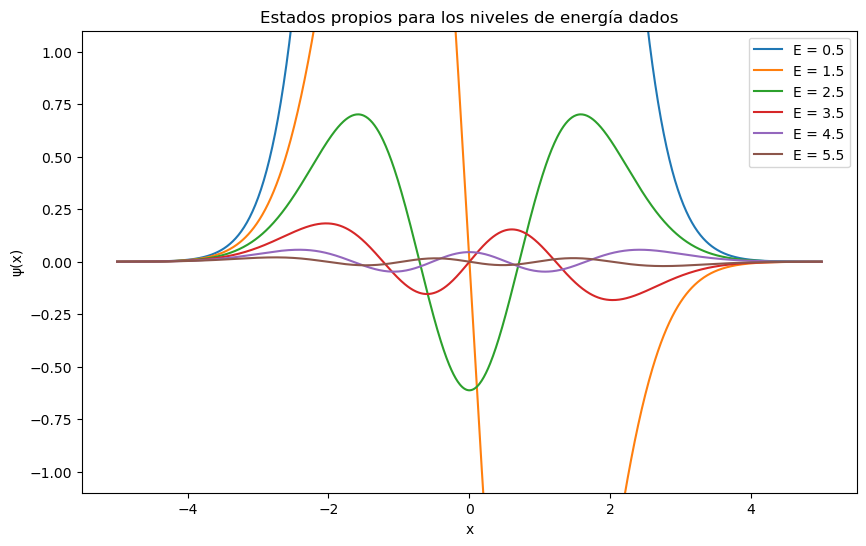

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x_min, x_max = -5, 5
x = np.linspace(x_min, x_max, N)
h = x[1] - x[0]

def V(x):
    
    m = 1
    omega = 1
    return 0.5 * m * omega**2 * x**2

def numerov(x, V, E):
    
    psi = np.zeros_like(x)
    psi[1] = 1e-5

    for i in range(1, len(x) - 1):
        R_n_plus = 2 * (V(x[i + 1]) - E)
        R_n = 2 * (V(x[i]) - E)
        R_n_minus = 2 * (V(x[i - 1]) - E)

        K_plus = 1 - h**2 / 12 * R_n_plus
        K_minus = 1 - h**2 / 12 * R_n_minus

        psi[i + 1] = (2 * (1 + 5 * h**2 / 12 * R_n) * psi[i] - K_minus * psi[i - 1]) / K_plus

    return psi

def plot_wavefunctions(x, V, energies):
    plt.figure(figsize=(10, 6))

    for E in energies:
        psi = numerov(x, V, E)
        plt.plot(x, psi, label=f'E = {E:.1f}')

    plt.title('Estados propios para los niveles de energía dados')
    plt.xlabel('x')
    plt.ylabel('ψ(x)')
    plt.ylim(-1.1, 1.1)  # Ajusta según sea necesario para visualizar bien las funciones de onda
    plt.legend()
    plt.show()

energies = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]

plot_wavefunctions(x, V, energies)